### 직접 만드는 Feed Forward Neural Network
1개의 neuron 만으로 구성되는 단순한 FFNN regresser를 구현해보자.

for one sample (x, y) :
$$\begin{aligned}
s &= x \cdot w + b \\
e &= (s - y)^2
\end{aligned}$$

for gradients :
$$\begin{aligned}
\Delta w = \cfrac {\partial e}{\partial w} &= \cfrac{\partial e}{\partial s} \cfrac{\partial s}{\partial w} = 2 (s - y) \cdot x \\
&= 2(s - y) \cdot x \\
\Delta b = \cfrac {\partial e}{\partial b} &= \cfrac{\partial e}{\partial s} \cfrac{\partial s}{\partial b} = 2 (s - y) \cdot 1
\end{aligned}$$

for batch samples :
- (grad_w, grad_b) = average (de/dw, de/db) over samples in batch

for update :
- w -= grad_w * learning_rate
- b -= grad_b * learning_rate

In [197]:
import numpy as np
from numpy.random import shuffle, rand

In [198]:
x_train = np.random.rand(1024, 1)
y_train = x_train * 2 + 1

In [199]:
x_val = np.random.rand(32, 1)
y_val = x_val * 2 + 1

x_test = np.arange(1, 5).reshape(-1,1) * 2 / 10
y_test = x_test * 2 + 1
x_test

array([[0.2],
       [0.4],
       [0.6],
       [0.8]])

In [278]:
class FFNN:
    def __init__(self, lr=0.01):
        self.lr = lr
        # initial weights: w는 .5, b는 .0
        self.w = np.array([.5]).reshape(-1, 1)
        self.b = np.array([.0])
        
        
    def calc_sum(self, x, w, b):
        pass
    
    # feed forward network
    def predict(self, x):
        predict_y = np.dot(x, self.w) + self.b
        return predict_y
    
    # train for one batch. x 자체가 batch
    def train_on_batch(self, x, y, istrain=True):
        predict_y = self.predict(x)
        N = x.shape[0]
        loss = np.sum((predict_y - y) ** 2)
        if istrain:
            dw = np.dot(x.T, (predict_y - y)) / N
            db = np.sum(predict_y - y) / N
            self.w -= dw
            self.b -= db
        return loss
    
    # epochs 동안 batch 단위의 학습을 반복하며, loss를 추가함.
    def fit(self, x, y, batch_size=16, epochs=100, val_data=None):
        Losses = {}
        Losses["train_loss"] = []
        if val_data is not None:
            Losses["val_loss"] = []
        test_case = int(x.shape[0]//batch_size)
        randRow = np.arange(x.shape[0])

        for i in range(epochs):
            Loss = 0
            shuffle(randRow)
            for t in range(test_case):
#                 print(randRow[1008:1024] )
                batch_idx = t*batch_size
                x_batch = x[randRow[batch_idx: batch_idx+batch_size]]
                y_batch = y[randRow[batch_idx: batch_idx+batch_size]]
#                 print("Here : ", randRow[batch_idx: batch_idx+batch_size])
                Loss += self.train_on_batch(x_batch, y_batch)
                
            
            Losses["train_loss"].append((Loss/test_case))
            if val_data is not None:
                val_Loss = 0

                val_x = val_data[0]
                val_y = val_data[1]
                predict_y = self.predict(x)

                val_Loss = self.train_on_batch(val_x, val_y, False)
                
                Losses["val_loss"].append((val_Loss))
                
        return Losses

In [279]:
model = FFNN()

In [280]:
hist = model.fit(x_train, y_train, val_data=(x_val, y_val))

In [281]:
hist

{'train_loss': [0.8597697933966986,
  1.5513344730094594e-05,
  2.3445798855678946e-09,
  3.4339984455463443e-13,
  4.9902467920739587e-17,
  7.305146938681641e-21,
  1.1191496161180097e-24,
  1.6052703123665386e-28,
  2.981339553911441e-31,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_loss': [0.0002542451516242397,
  3.035175797110779e-08,
  4.338968508608027e-12,
  5.216165660189839e-16,
  7.9133

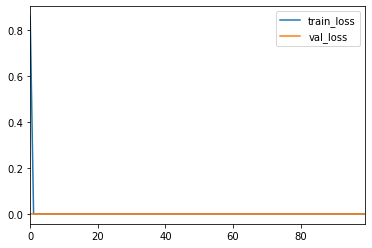

In [282]:
import pandas as pd
import matplotlib.pyplot as plt

df_hist = pd.DataFrame(hist)
# loss의 결과를 시각화하세요.
df_hist.plot()

In [283]:
model.w

array([[2.]])

In [284]:
model.b

array([1.])